In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [4]:
import tensorflow as tf
from tensorflow import keras

In [6]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [9]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history=model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 240us/sample - loss: 1.9042 - val_loss: 5.2232
Epoch 2/20
11610/11610 [==============================] - 2s 183us/sample - loss: 0.8337 - val_loss: 1.7539
Epoch 3/20
11610/11610 [==============================] - 2s 187us/sample - loss: 0.6958 - val_loss: 0.8909
Epoch 4/20
11610/11610 [==============================] - 2s 184us/sample - loss: 0.6356 - val_loss: 0.6254
Epoch 5/20
11610/11610 [==============================] - 2s 180us/sample - loss: 0.5965 - val_loss: 0.5564
Epoch 6/20
11610/11610 [==============================] - 2s 181us/sample - loss: 0.5663 - val_loss: 0.5322
Epoch 7/20
11610/11610 [==============================] - 2s 180us/sample - loss: 0.5420 - val_loss: 0.5115
Epoch 8/20
11610/11610 [==============================] - 2s 194us/sample - loss: 0.5219 - val_loss: 0.5046
Epoch 9/20
11610/11610 [==============================] - 2s 208us/sample - loss: 0.504

In [10]:
history

In [14]:
history.history.keys()

dict_keys(['loss', 'val_loss'])

In [15]:
history.params

{'batch_size': 32,
 'epochs': 20,
 'steps': 363,
 'samples': 11610,
 'verbose': 0,
 'do_validation': True,
 'metrics': ['loss', 'val_loss']}

In [16]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]


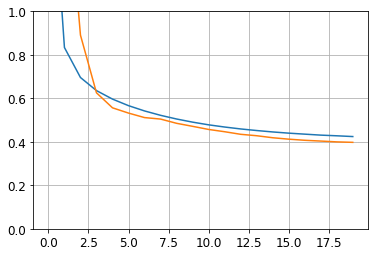

In [20]:
import pandas as pd
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
y_pred

array([[0.630858 ],
       [1.5699117],
       [3.2894657]], dtype=float32)

In [22]:
X_new

array([[-1.15780104, -0.28673138, -0.49550877, -0.16618097, -0.02946012,
         0.38899735,  0.19374821,  0.2870474 ],
       [-0.7125531 ,  0.10880952, -0.16332973,  0.20164652,  0.12842117,
        -0.11818174, -0.23725261,  0.06215231],
       [-0.2156101 ,  1.8491895 , -0.57982788,  0.18528489, -0.10429403,
        -0.67694905,  1.00890193, -1.4271529 ]])

In [23]:
np.random.seed(42)
tf.random.set_seed(42)

In [27]:
input_= keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [28]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           270         input_4[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           930         dense_10[0][0]                   
__________________________________________________________________________________________________
concatenate_2 (Concatenate)     (None, 38)           0           input_4[0][0]                    
                                                                 dense_11[0][0]               

In [29]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Train on 11610 samples, validate on 3870 samples
Epoch 1/20
11610/11610 [==============================] - 3s 265us/sample - loss: 1.8948 - val_loss: 1.4578
Epoch 2/20
11610/11610 [==============================] - 2s 206us/sample - loss: 0.6979 - val_loss: 0.6347
Epoch 3/20
11610/11610 [==============================] - 3s 238us/sample - loss: 0.6269 - val_loss: 0.5987
Epoch 4/20
11610/11610 [==============================] - 2s 199us/sample - loss: 0.5847 - val_loss: 0.5395
Epoch 5/20
11610/11610 [==============================] - 3s 230us/sample - loss: 0.5508 - val_loss: 0.6431
Epoch 6/20
11610/11610 [==============================] - 4s 348us/sample - loss: 0.5226 - val_loss: 0.6318
Epoch 7/20
11610/11610 [==============================] - 4s 308us/sample - loss: 0.5026 - val_loss: 0.5385
Epoch 8/20
11610/11610 [==============================] - 3s 256us/sample - loss: 0.4828 - val_loss: 0.4695
Epoch 9/20
11610/11610 [==============================] - 4s 362us/sample - loss: 0.468

In [30]:
np.random.seed(42)
tf.random.set_seed(42)

In [31]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])   

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Train on 11610 samples, validate on 3870 samples
Epoch 1/10
11610/11610 [==============================] - 3s 281us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/10
11610/11610 [==============================] - 2s 191us/sample - loss: 0.6723 - val_loss: 0.6938
Epoch 3/10
11610/11610 [==============================] - 2s 190us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/10
11610/11610 [==============================] - 2s 168us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/10
11610/11610 [==============================] - 2s 186us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/10
11610/11610 [==============================] - 3s 227us/sample - loss: 0.5032 - val_loss: 0.5590
Epoch 7/10
11610/11610 [==============================] - 2s 176us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/10
11610/11610 [==============================] - 2s 182us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/10
11610/11610 [==============================] - 2s 205us/sample - loss: 0.458

In [32]:
model.save("my_keras_model.h5")

In [33]:
model.predict(X_new)

array([[0.5490948],
       [1.6585002],
       [3.0270114]], dtype=float32)

In [34]:
model.save_weights("my_keras_weights.ckpt")

In [35]:
model.load_weights("my_keras_weights.ckpt")

In [36]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [39]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [40]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("m_keras_model.h5", save_best_only=True)


In [41]:
root_logdir = os.path.join(os.curdir, "my_logs")

def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'./my_logs/run_2020_02_17-00_20_38'

In [42]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [43]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [44]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 4s 344us/sample - loss: 1.8631 - val_loss: 3.2403
Epoch 2/30
11610/11610 [==============================] - 3s 219us/sample - loss: 0.6723 - val_loss: 0.6938
Epoch 3/30
11610/11610 [==============================] - 2s 210us/sample - loss: 0.5927 - val_loss: 0.5531
Epoch 4/30
11610/11610 [==============================] - 3s 233us/sample - loss: 0.5550 - val_loss: 0.5519
Epoch 5/30
11610/11610 [==============================] - 3s 237us/sample - loss: 0.5278 - val_loss: 0.5715
Epoch 6/30
11610/11610 [==============================] - 3s 279us/sample - loss: 0.5032 - val_loss: 0.5590
Epoch 7/30
11610/11610 [==============================] - 3s 298us/sample - loss: 0.4863 - val_loss: 0.4593
Epoch 8/30
11610/11610 [==============================] - 3s 275us/sample - loss: 0.4701 - val_loss: 0.4651
Epoch 9/30
11610/11610 [==============================] - 3s 225us/sample - loss: 0.458

In [45]:
run_logdir2 = get_run_logdir()
run_logdir2

'./my_logs/run_2020_02_17-00_25_09'

In [46]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [47]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

In [48]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Train on 11610 samples, validate on 3870 samples
Epoch 1/30
11610/11610 [==============================] - 3s 280us/sample - loss: 0.7860 - val_loss: 3.9608
Epoch 2/30
11610/11610 [==============================] - 3s 239us/sample - loss: 0.4406 - val_loss: 19.3300
Epoch 3/30
11610/11610 [==============================] - 3s 224us/sample - loss: 0.3807 - val_loss: 1.9264
Epoch 4/30
11610/11610 [==============================] - 2s 200us/sample - loss: 0.4054 - val_loss: 0.3549
Epoch 5/30
11610/11610 [==============================] - 2s 206us/sample - loss: 0.3708 - val_loss: 0.3230
Epoch 6/30
11610/11610 [==============================] - 3s 217us/sample - loss: 0.3621 - val_loss: 0.3154
Epoch 7/30
11610/11610 [==============================] - 3s 218us/sample - loss: 0.3505 - val_loss: 0.3153
Epoch 8/30
11610/11610 [==============================] - 2s 196us/sample - loss: 0.3408 - val_loss: 18.2394
Epoch 9/30
11610/11610 [==============================] - 2s 202us/sample - loss: 0.3

In [49]:
help(keras.callbacks.TensorBoard.__init__)

Help on function __init__ in module tensorflow.python.keras.callbacks:

__init__(self, log_dir='logs', histogram_freq=0, write_graph=True, write_images=False, update_freq='epoch', profile_batch=2, embeddings_freq=0, embeddings_metadata=None, **kwargs)
    Initialize self.  See help(type(self)) for accurate signature.



In [50]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
from tensorflow.keras import optimizers

In [61]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    
    return model

In [62]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [63]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 3s 229us/sample - loss: 1.1308 - val_loss: 3.8843
Epoch 2/100
11610/11610 [==============================] - 3s 275us/sample - loss: 0.7124 - val_loss: 3.5901
Epoch 3/100
11610/11610 [==============================] - 3s 237us/sample - loss: 0.5906 - val_loss: 1.7968
Epoch 4/100
11610/11610 [==============================] - 2s 204us/sample - loss: 0.5258 - val_loss: 0.6850
Epoch 5/100
11610/11610 [==============================] - 3s 289us/sample - loss: 0.4722 - val_loss: 0.4273
Epoch 6/100
11610/11610 [==============================] - 2s 206us/sample - loss: 0.4467 - val_loss: 0.4369
Epoch 7/100
11610/11610 [==============================] - 2s 182us/sample - loss: 0.4319 - val_loss: 0.3953
Epoch 8/100
11610/11610 [==============================] - 2s 201us/sample - loss: 0.4220 - val_loss: 0.4379
Epoch 9/100
11610/11610 [==============================] - 2s 194us/sample - lo

In [64]:
mse_test = keras_reg.score(X_test, y_test)

5160/1 [================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [65]:
y_pred = keras_reg.predict(X_new)

In [66]:
y_pred

array([0.5885142, 1.7507247, 4.010346 ], dtype=float32)

In [67]:
np.random.seed(42)
tf.random.set_seed(42)

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [68]:
param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 138us/sample - loss: 3.5564 - val_loss: 1.8584
Epoch 2/100
7740/7740 [==============================] - 1s 66us/sample - loss: 1.3350 - val_loss: 0.9421
Epoch 3/100
7740/7740 [==============================] - 1s 82us/sample - loss: 0.8579 - val_loss: 0.7273
Epoch 4/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.7340 - val_loss: 0.9321
Epoch 5/100
7740/7740 [==============================] - 1s 76us/sample - loss: 0.6951 - val_loss: 0.6364
Epoch 6/100
7740/7740 [==============================] - 1s 81us/sample - loss: 0.6682 - val_loss: 0.8188
Epoch 7/100
7740/7740 [==============================] - 1s 77us/sample - loss: 0.6526 - val_loss: 0.7451
Epoch 8/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.6386 - val_loss: 0.6280
Epoch 9/100
7740/7740 [==============================] - 1s 89us/sample - loss: 0.6251 - val_loss: 0.69

[CV]  learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15, total=  18.0s
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   18.0s remaining:    0.0s


7740/7740 [==============================] - 1s 124us/sample - loss: 3.5557 - val_loss: 23.2477
Epoch 2/100
7740/7740 [==============================] - 1s 67us/sample - loss: 1.4772 - val_loss: 10.8630
Epoch 3/100
7740/7740 [==============================] - 1s 89us/sample - loss: 1.0155 - val_loss: 4.4730
Epoch 4/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.8734 - val_loss: 1.5265
Epoch 5/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.8032 - val_loss: 0.7206
Epoch 6/100
7740/7740 [==============================] - 1s 69us/sample - loss: 0.7550 - val_loss: 1.1635
Epoch 7/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.7167 - val_loss: 2.4032
Epoch 8/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.6855 - val_loss: 4.0540
Epoch 9/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.6591 - val_loss: 5.9448
Epoch 10/100
7740/7740 [==============================]

[CV]  learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15, total=   8.7s
[CV] learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 133us/sample - loss: 3.2689 - val_loss: 1.3818
Epoch 2/100
7740/7740 [==============================] - 1s 70us/sample - loss: 0.9650 - val_loss: 0.7308
Epoch 3/100
7740/7740 [==============================] - 1s 72us/sample - loss: 0.6171 - val_loss: 0.5392
Epoch 4/100
7740/7740 [==============================] - 1s 65us/sample - loss: 0.5491 - val_loss: 0.5124
Epoch 5/100
7740/7740 [==============================] - 1s 81us/sample - loss: 0.5355 - val_loss: 0.5908
Epoch 6/100
7740/7740 [==============================] - 1s 87us/sample - loss: 0.5310 - val_loss: 0.7897
Epoch 7/100
7740/7740 [==============================] - 1s 90us/sample - loss: 0.5344 - val_loss: 0.5654
Epoch 8/100
7740/7740 [==============================] -

[CV]  learning_rate=0.001683454924600351, n_hidden=0, n_neurons=15, total=   8.8s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 124us/sample - loss: 1.4462 - val_loss: 5.1308
Epoch 2/100
7740/7740 [==============================] - 1s 80us/sample - loss: 0.6498 - val_loss: 12.7918
Epoch 3/100
7740/7740 [==============================] - 1s 88us/sample - loss: 0.6009 - val_loss: 0.5573
Epoch 4/100
7740/7740 [==============================] - 1s 83us/sample - loss: 0.5603 - val_loss: 2.6121
Epoch 5/100
7740/7740 [==============================] - 0s 60us/sample - loss: 0.6319 - val_loss: 151.6786
Epoch 6/100
7740/7740 [==============================] - 1s 76us/sample - loss: 1.7132 - val_loss: 528.7381
Epoch 7/100
7740/7740 [==============================] - 1s 69us/sample - loss: 6.1401 - val_loss: 2334.6884
Epoch 8/100
7740/7740 [=========================

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   8.2s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 120us/sample - loss: 1.1692 - val_loss: 23.5191
Epoch 2/100
7740/7740 [==============================] - 1s 66us/sample - loss: 0.5356 - val_loss: 22.9158
Epoch 3/100
7740/7740 [==============================] - 1s 85us/sample - loss: 0.5234 - val_loss: 22.1786
Epoch 4/100
7740/7740 [==============================] - 1s 92us/sample - loss: 0.5157 - val_loss: 22.7104
Epoch 5/100
7740/7740 [==============================] - 1s 89us/sample - loss: 0.5119 - val_loss: 19.5439
Epoch 6/100
7740/7740 [==============================] - 1s 88us/sample - loss: 0.5085 - val_loss: 17.4588
Epoch 7/100
7740/7740 [==============================] - 1s 90us/sample - loss: 0.5065 - val_loss: 19.9278
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=  10.9s
[CV] learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 147us/sample - loss: 1.4012 - val_loss: 22.6568
Epoch 2/100
7740/7740 [==============================] - 0s 64us/sample - loss: 0.8933 - val_loss: 74.3529
Epoch 3/100
7740/7740 [==============================] - 1s 67us/sample - loss: 0.6764 - val_loss: 35.7059
Epoch 4/100
7740/7740 [==============================] - 0s 59us/sample - loss: 0.8437 - val_loss: 237.3450
Epoch 5/100
7740/7740 [==============================] - 0s 62us/sample - loss: 3.7140 - val_loss: 400.4508
Epoch 6/100
7740/7740 [==============================] - 1s 71us/sample - loss: 11.2961 - val_loss: 689.5318
Epoch 7/100
7740/7740 [==============================] - 1s 84us/sample - loss: 3.4443 - val_loss: 1111.7931
Epoch 8/100
7740/7740 [====================

[CV]  learning_rate=0.008731907739399206, n_hidden=0, n_neurons=21, total=   6.8s
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 321us/sample - loss: 2.4633 - val_loss: 5.9456
Epoch 2/100
7740/7740 [==============================] - 2s 218us/sample - loss: 1.1215 - val_loss: 1.4347
Epoch 3/100
7740/7740 [==============================] - 2s 230us/sample - loss: 0.8125 - val_loss: 0.8367
Epoch 4/100
7740/7740 [==============================] - 2s 225us/sample - loss: 0.7208 - val_loss: 0.6798
Epoch 5/100
7740/7740 [==============================] - 2s 240us/sample - loss: 0.6788 - val_loss: 0.6425
Epoch 6/100
7740/7740 [==============================] - 2s 227us/sample - loss: 0.6498 - val_loss: 0.6208
Epoch 7/100
7740/7740 [==============================] - 2s 212us/sample - loss: 0.6262 - val_loss: 0.5985
Epoch 8/100
7740/7740 [===========================

7740/7740 [==============================] - 2s 213us/sample - loss: 0.3541 - val_loss: 0.3570
Epoch 76/100
7740/7740 [==============================] - 2s 211us/sample - loss: 0.3535 - val_loss: 0.3577
Epoch 77/100
7740/7740 [==============================] - 1s 187us/sample - loss: 0.3528 - val_loss: 0.3833
Epoch 78/100
7740/7740 [==============================] - 2s 221us/sample - loss: 0.3522 - val_loss: 0.3699
Epoch 79/100
7740/7740 [==============================] - 2s 242us/sample - loss: 0.3517 - val_loss: 0.3741
Epoch 80/100
7740/7740 [==============================] - 2s 221us/sample - loss: 0.3510 - val_loss: 0.3835
Epoch 81/100
7740/7740 [==============================] - 2s 214us/sample - loss: 0.3506 - val_loss: 0.3608
Epoch 82/100
7740/7740 [==============================] - 2s 227us/sample - loss: 0.3498 - val_loss: 0.3637
Epoch 83/100
7740/7740 [==============================] - 2s 231us/sample - loss: 0.3494 - val_loss: 0.3600
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total= 2.6min
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 293us/sample - loss: 2.7684 - val_loss: 18.4083
Epoch 2/100
7740/7740 [==============================] - 2s 214us/sample - loss: 1.1143 - val_loss: 15.3327
Epoch 3/100
7740/7740 [==============================] - 2s 262us/sample - loss: 0.8059 - val_loss: 11.0646
Epoch 4/100
7740/7740 [==============================] - 2s 212us/sample - loss: 0.7051 - val_loss: 8.1682
Epoch 5/100
7740/7740 [==============================] - 2s 212us/sample - loss: 0.6574 - val_loss: 6.1023
Epoch 6/100
7740/7740 [==============================] - 2s 224us/sample - loss: 0.6258 - val_loss: 4.6822
Epoch 7/100
7740/7740 [==============================] - 2s 225us/sample - loss: 0.6006 - val_loss: 3.6827
Epoch 8/100
7740/7740 [=======================

[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total= 1.1min
[CV] learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 264us/sample - loss: 2.8290 - val_loss: 4.4146
Epoch 2/100
7740/7740 [==============================] - 2s 226us/sample - loss: 1.1367 - val_loss: 1.1500
Epoch 3/100
7740/7740 [==============================] - 2s 233us/sample - loss: 0.8424 - val_loss: 0.8068
Epoch 4/100
7740/7740 [==============================] - 2s 243us/sample - loss: 0.7625 - val_loss: 0.7274
Epoch 5/100
7740/7740 [==============================] - 2s 254us/sample - loss: 0.7218 - val_loss: 0.6908
Epoch 6/100
7740/7740 [==============================] - 2s 235us/sample - loss: 0.6927 - val_loss: 0.6563
Epoch 7/100
7740/7740 [==============================] - 2s 231us/sample - loss: 0.6683 - val_loss: 0.6336
Epoch 8/100
7740/7740 [==========================

7740/7740 [==============================] - 2s 226us/sample - loss: 0.3675 - val_loss: 0.3763
Epoch 76/100
7740/7740 [==============================] - 2s 216us/sample - loss: 0.3668 - val_loss: 0.3799
Epoch 77/100
7740/7740 [==============================] - 2s 239us/sample - loss: 0.3662 - val_loss: 0.3792
Epoch 78/100
7740/7740 [==============================] - 2s 211us/sample - loss: 0.3657 - val_loss: 0.3892
Epoch 79/100
7740/7740 [==============================] - 2s 215us/sample - loss: 0.3652 - val_loss: 0.3812
Epoch 80/100
7740/7740 [==============================] - 2s 213us/sample - loss: 0.3646 - val_loss: 0.3764
Epoch 81/100
7740/7740 [==============================] - 2s 226us/sample - loss: 0.3639 - val_loss: 0.3870
3870/1 [=========================================================================================================================================================================================================================================================

[CV]  learning_rate=0.0006154014789262348, n_hidden=2, n_neurons=87, total= 2.8min
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 297us/sample - loss: 2.3816 - val_loss: 14.5442
Epoch 2/100
7740/7740 [==============================] - 2s 225us/sample - loss: 1.2100 - val_loss: 5.8430
Epoch 3/100
7740/7740 [==============================] - 2s 224us/sample - loss: 0.9043 - val_loss: 4.3275
Epoch 4/100
7740/7740 [==============================] - 2s 230us/sample - loss: 0.8113 - val_loss: 3.4674
Epoch 5/100
7740/7740 [==============================] - 2s 240us/sample - loss: 0.7714 - val_loss: 2.7485
Epoch 6/100
7740/7740 [==============================] - 2s 231us/sample - loss: 0.7425 - val_loss: 2.3965
Epoch 7/100
7740/7740 [==============================] - 2s 235us/sample - loss: 0.7204 - val_loss: 2.1100
Epoch 8/100
7740/7740 [=========================

[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total= 2.3min
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 320us/sample - loss: 3.7588 - val_loss: 28.7992
Epoch 2/100
7740/7740 [==============================] - 2s 224us/sample - loss: 2.0541 - val_loss: 42.6182
Epoch 3/100
7740/7740 [==============================] - 2s 252us/sample - loss: 1.6147 - val_loss: 37.3708
Epoch 4/100
7740/7740 [==============================] - 2s 210us/sample - loss: 1.3635 - val_loss: 28.7112
Epoch 5/100
7740/7740 [==============================] - 2s 247us/sample - loss: 1.1710 - val_loss: 20.3691
Epoch 6/100
7740/7740 [==============================] - 2s 237us/sample - loss: 1.0281 - val_loss: 14.3878
Epoch 7/100
7740/7740 [==============================] - 2s 246us/sample - loss: 0.9283 - val_loss: 10.6283
Epoch 8/100
7740/7740 [===================

[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total= 1.0min
[CV] learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 297us/sample - loss: 2.9155 - val_loss: 4.8947
Epoch 2/100
7740/7740 [==============================] - 2s 235us/sample - loss: 1.2940 - val_loss: 3.0524
Epoch 3/100
7740/7740 [==============================] - 2s 229us/sample - loss: 0.9739 - val_loss: 1.9077
Epoch 4/100
7740/7740 [==============================] - 2s 230us/sample - loss: 0.8515 - val_loss: 1.3465
Epoch 5/100
7740/7740 [==============================] - 2s 264us/sample - loss: 0.7859 - val_loss: 0.9787
Epoch 6/100
7740/7740 [==============================] - 2s 237us/sample - loss: 0.7436 - val_loss: 0.7981
Epoch 7/100
7740/7740 [==============================] - 2s 241us/sample - loss: 0.7132 - val_loss: 0.7103
Epoch 8/100
7740/7740 [==========================

7740/7740 [==============================] - 2s 255us/sample - loss: 0.4069 - val_loss: 0.4311
Epoch 76/100
7740/7740 [==============================] - 2s 211us/sample - loss: 0.4062 - val_loss: 0.4283
Epoch 77/100
7740/7740 [==============================] - 2s 231us/sample - loss: 0.4055 - val_loss: 0.4248
Epoch 78/100
7740/7740 [==============================] - 2s 200us/sample - loss: 0.4047 - val_loss: 0.4279
Epoch 79/100
7740/7740 [==============================] - 2s 248us/sample - loss: 0.4041 - val_loss: 0.4235
Epoch 80/100
7740/7740 [==============================] - 2s 227us/sample - loss: 0.4033 - val_loss: 0.4187
Epoch 81/100
7740/7740 [==============================] - 2s 234us/sample - loss: 0.4025 - val_loss: 0.4228
Epoch 82/100
7740/7740 [==============================] - 2s 239us/sample - loss: 0.4019 - val_loss: 0.4225
Epoch 83/100
7740/7740 [==============================] - 2s 207us/sample - loss: 0.4011 - val_loss: 0.4265
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.0003920021771415983, n_hidden=3, n_neurons=24, total= 3.1min
[CV] learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 115us/sample - loss: 2.1242 - val_loss: 27.5149
Epoch 2/100
7740/7740 [==============================] - 1s 96us/sample - loss: 1.0018 - val_loss: 131.2478
Epoch 3/100
7740/7740 [==============================] - 1s 77us/sample - loss: 1.4620 - val_loss: 194.3883
Epoch 4/100
7740/7740 [==============================] - 1s 84us/sample - loss: 4.2615 - val_loss: 400.2877
Epoch 5/100
7740/7740 [==============================] - 1s 84us/sample - loss: 2.5353 - val_loss: 686.7762
Epoch 6/100
7740/7740 [==============================] - 0s 64us/sample - loss: 8.5730 - val_loss: 1577.7315
Epoch 7/100
7740/7740 [==============================] - 1s 92us/sample - loss: 13.6798 - val_loss: 3490.3964
Epoch 8/100
7740/7740 [================

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   8.0s
[CV] learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 142us/sample - loss: 1.4717 - val_loss: 13.8555
Epoch 2/100
7740/7740 [==============================] - 1s 76us/sample - loss: 0.5772 - val_loss: 17.0247
Epoch 3/100
7740/7740 [==============================] - 1s 96us/sample - loss: 0.5518 - val_loss: 18.8021
Epoch 4/100
7740/7740 [==============================] - 1s 91us/sample - loss: 0.5369 - val_loss: 20.2835
Epoch 5/100
7740/7740 [==============================] - 1s 78us/sample - loss: 0.5277 - val_loss: 19.3474
Epoch 6/100
7740/7740 [==============================] - 1s 89us/sample - loss: 0.5205 - val_loss: 18.4462
Epoch 7/100
7740/7740 [==============================] - 1s 85us/sample - loss: 0.5158 - val_loss: 19.6960
Epoch 8/100
7740/7740 [===========================

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   7.9s
[CV] learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2 .....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 137us/sample - loss: 1.9040 - val_loss: 1.7294
Epoch 2/100
7740/7740 [==============================] - 1s 73us/sample - loss: 0.5866 - val_loss: 0.8622
Epoch 3/100
7740/7740 [==============================] - 1s 86us/sample - loss: 0.6039 - val_loss: 12.8724
Epoch 4/100
7740/7740 [==============================] - 1s 80us/sample - loss: 0.5834 - val_loss: 1.4582
Epoch 5/100
7740/7740 [==============================] - 1s 84us/sample - loss: 0.6221 - val_loss: 3.3087
Epoch 6/100
7740/7740 [==============================] - 1s 84us/sample - loss: 0.5511 - val_loss: 11.6689
Epoch 7/100
7740/7740 [==============================] - 1s 95us/sample - loss: 0.7116 - val_loss: 29.9577
Epoch 8/100
7740/7740 [==============================]

[CV]  learning_rate=0.006010328378268217, n_hidden=0, n_neurons=2, total=   8.6s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 324us/sample - loss: 1.2466 - val_loss: 39.3874
Epoch 2/100
7740/7740 [==============================] - 1s 178us/sample - loss: 0.9034 - val_loss: 356.6108
Epoch 3/100
7740/7740 [==============================] - 2s 210us/sample - loss: 1.9792 - val_loss: 0.7164
Epoch 4/100
7740/7740 [==============================] - 1s 181us/sample - loss: 0.4649 - val_loss: 0.4108
Epoch 5/100
7740/7740 [==============================] - 2s 203us/sample - loss: 0.4134 - val_loss: 1.0029
Epoch 6/100
7740/7740 [==============================] - 1s 185us/sample - loss: 0.3971 - val_loss: 1.1990
Epoch 7/100
7740/7740 [==============================] - 2s 211us/sample - loss: 0.4032 - val_loss: 5.3808
Epoch 8/100
7740/7740 [=========================

[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=  32.0s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 238us/sample - loss: 0.8880 - val_loss: 2.6958
Epoch 2/100
7740/7740 [==============================] - 1s 183us/sample - loss: 0.5231 - val_loss: 0.4678
Epoch 3/100
7740/7740 [==============================] - 2s 199us/sample - loss: 0.4631 - val_loss: 0.4749
Epoch 4/100
7740/7740 [==============================] - 1s 190us/sample - loss: 0.4359 - val_loss: 0.4024
Epoch 5/100
7740/7740 [==============================] - 1s 177us/sample - loss: 0.4209 - val_loss: 0.4751
Epoch 6/100
7740/7740 [==============================] - 1s 180us/sample - loss: 0.4118 - val_loss: 0.4977
Epoch 7/100
7740/7740 [==============================] - 1s 183us/sample - loss: 0.4057 - val_loss: 0.7345
Epoch 8/100
7740/7740 [===========================

[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total=  22.1s
[CV] learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 272us/sample - loss: 1.1476 - val_loss: 19.1236
Epoch 2/100
7740/7740 [==============================] - 1s 191us/sample - loss: 0.6004 - val_loss: 43.3496
Epoch 3/100
7740/7740 [==============================] - 2s 218us/sample - loss: 0.6625 - val_loss: 23.9919
Epoch 4/100
7740/7740 [==============================] - 1s 181us/sample - loss: 0.6275 - val_loss: 2.5008
Epoch 5/100
7740/7740 [==============================] - 1s 185us/sample - loss: 0.4657 - val_loss: 0.4522
Epoch 6/100
7740/7740 [==============================] - 1s 184us/sample - loss: 0.4227 - val_loss: 0.4120
Epoch 7/100
7740/7740 [==============================] - 2s 219us/sample - loss: 0.4121 - val_loss: 0.3991
Epoch 8/100
7740/7740 [========================

[CV]  learning_rate=0.008339092654580042, n_hidden=1, n_neurons=38, total= 1.6min
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 326us/sample - loss: 4.0154 - val_loss: 8.4338
Epoch 2/100
7740/7740 [==============================] - 2s 196us/sample - loss: 2.3190 - val_loss: 7.3895
Epoch 3/100
7740/7740 [==============================] - 2s 230us/sample - loss: 1.6395 - val_loss: 5.5681
Epoch 4/100
7740/7740 [==============================] - 2s 265us/sample - loss: 1.3384 - val_loss: 4.1801
Epoch 5/100
7740/7740 [==============================] - 2s 194us/sample - loss: 1.1802 - val_loss: 2.6829
Epoch 6/100
7740/7740 [==============================] - 2s 236us/sample - loss: 1.0684 - val_loss: 2.1789
Epoch 7/100
7740/7740 [==============================] - 2s 262us/sample - loss: 0.9882 - val_loss: 1.7644
Epoch 8/100
7740/7740 [===========================

7740/7740 [==============================] - 1s 174us/sample - loss: 0.4190 - val_loss: 0.4076
Epoch 76/100
7740/7740 [==============================] - 2s 209us/sample - loss: 0.4173 - val_loss: 0.4059
Epoch 77/100
7740/7740 [==============================] - 1s 194us/sample - loss: 0.4156 - val_loss: 0.4041
Epoch 78/100
7740/7740 [==============================] - 2s 195us/sample - loss: 0.4139 - val_loss: 0.4025
Epoch 79/100
7740/7740 [==============================] - 1s 189us/sample - loss: 0.4123 - val_loss: 0.4010
Epoch 80/100
7740/7740 [==============================] - 2s 224us/sample - loss: 0.4107 - val_loss: 0.4001
Epoch 81/100
7740/7740 [==============================] - 2s 267us/sample - loss: 0.4092 - val_loss: 0.3988
Epoch 82/100
7740/7740 [==============================] - 2s 322us/sample - loss: 0.4076 - val_loss: 0.3986
Epoch 83/100
7740/7740 [==============================] - 2s 301us/sample - loss: 0.4063 - val_loss: 0.3969
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total= 3.1min
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 357us/sample - loss: 5.0627 - val_loss: 2.9619
Epoch 2/100
7740/7740 [==============================] - 2s 259us/sample - loss: 2.1420 - val_loss: 5.9065
Epoch 3/100
7740/7740 [==============================] - 2s 276us/sample - loss: 1.2787 - val_loss: 10.6548
Epoch 4/100
7740/7740 [==============================] - 2s 285us/sample - loss: 1.0909 - val_loss: 11.2295
Epoch 5/100
7740/7740 [==============================] - 2s 297us/sample - loss: 1.0057 - val_loss: 9.7659
Epoch 6/100
7740/7740 [==============================] - 2s 278us/sample - loss: 0.9450 - val_loss: 7.9557
Epoch 7/100
7740/7740 [==============================] - 2s 274us/sample - loss: 0.8984 - val_loss: 6.5072
Epoch 8/100
7740/7740 [=======================

[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total=  58.6s
[CV] learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21 ..
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 375us/sample - loss: 4.4054 - val_loss: 3.5453
Epoch 2/100
7740/7740 [==============================] - 2s 240us/sample - loss: 2.5632 - val_loss: 3.0304
Epoch 3/100
7740/7740 [==============================] - 3s 339us/sample - loss: 1.4056 - val_loss: 2.5104
Epoch 4/100
7740/7740 [==============================] - 2s 269us/sample - loss: 0.9829 - val_loss: 1.7405
Epoch 5/100
7740/7740 [==============================] - 2s 242us/sample - loss: 0.8388 - val_loss: 1.2852
Epoch 6/100
7740/7740 [==============================] - 2s 260us/sample - loss: 0.7690 - val_loss: 0.9827
Epoch 7/100
7740/7740 [==============================] - 2s 276us/sample - loss: 0.7274 - val_loss: 0.8182
Epoch 8/100
7740/7740 [=========================

[CV]  learning_rate=0.00030107783636342726, n_hidden=3, n_neurons=21, total= 2.1min
[CV] learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 294us/sample - loss: 1.4786 - val_loss: 32.2154
Epoch 2/100
7740/7740 [==============================] - 2s 234us/sample - loss: 0.8372 - val_loss: 0.6056
Epoch 3/100
7740/7740 [==============================] - 2s 239us/sample - loss: 0.5351 - val_loss: 0.4733
Epoch 4/100
7740/7740 [==============================] - 2s 239us/sample - loss: 0.4868 - val_loss: 0.4441
Epoch 5/100
7740/7740 [==============================] - 2s 202us/sample - loss: 0.4613 - val_loss: 0.4300
Epoch 6/100
7740/7740 [==============================] - 2s 197us/sample - loss: 0.4455 - val_loss: 0.4229
Epoch 7/100
7740/7740 [==============================] - 2s 220us/sample - loss: 0.4345 - val_loss: 0.4182
Epoch 8/100
7740/7740 [========================

[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=  31.0s
[CV] learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 281us/sample - loss: 1.2435 - val_loss: 0.6645
Epoch 2/100
7740/7740 [==============================] - 2s 224us/sample - loss: 0.5790 - val_loss: 0.9961
Epoch 3/100
7740/7740 [==============================] - 2s 217us/sample - loss: 0.5141 - val_loss: 1.4106
Epoch 4/100
7740/7740 [==============================] - 2s 218us/sample - loss: 0.4821 - val_loss: 1.3241
Epoch 5/100
7740/7740 [==============================] - 2s 247us/sample - loss: 0.4607 - val_loss: 1.1473
Epoch 6/100
7740/7740 [==============================] - 2s 232us/sample - loss: 0.4442 - val_loss: 0.7063
Epoch 7/100
7740/7740 [==============================] - 2s 216us/sample - loss: 0.4326 - val_loss: 0.5003
Epoch 8/100
7740/7740 [===========================

[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total=  34.7s
[CV] learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22 ....
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 3s 367us/sample - loss: 1.7713 - val_loss: 42.9949
Epoch 2/100
7740/7740 [==============================] - 1s 162us/sample - loss: 0.8447 - val_loss: 0.5217
Epoch 3/100
7740/7740 [==============================] - 1s 161us/sample - loss: 0.5263 - val_loss: 0.4754
Epoch 4/100
7740/7740 [==============================] - 1s 154us/sample - loss: 0.4931 - val_loss: 0.4464
Epoch 5/100
7740/7740 [==============================] - 2s 214us/sample - loss: 0.4720 - val_loss: 0.4311
Epoch 6/100
7740/7740 [==============================] - 2s 268us/sample - loss: 0.4583 - val_loss: 0.4217
Epoch 7/100
7740/7740 [==============================] - 1s 178us/sample - loss: 0.4483 - val_loss: 0.4149
Epoch 8/100
7740/7740 [==========================

7740/7740 [==============================] - 2s 231us/sample - loss: 0.3547 - val_loss: 0.3520
Epoch 76/100
7740/7740 [==============================] - 2s 230us/sample - loss: 0.3547 - val_loss: 0.3506
Epoch 77/100
7740/7740 [==============================] - 2s 214us/sample - loss: 0.3581 - val_loss: 0.3511
Epoch 78/100
7740/7740 [==============================] - 2s 216us/sample - loss: 0.3544 - val_loss: 0.3502
Epoch 79/100
7740/7740 [==============================] - 2s 214us/sample - loss: 0.3533 - val_loss: 0.3507
Epoch 80/100
7740/7740 [==============================] - 2s 235us/sample - loss: 0.3532 - val_loss: 0.3487
Epoch 81/100
7740/7740 [==============================] - 2s 216us/sample - loss: 0.3560 - val_loss: 0.3511
Epoch 82/100
7740/7740 [==============================] - 1s 191us/sample - loss: 0.3523 - val_loss: 0.3490
Epoch 83/100
7740/7740 [==============================] - 2s 221us/sample - loss: 0.3510 - val_loss: 0.3586
Epoch 84/100
7740/7740 [=================

[CV]  learning_rate=0.005153286333701512, n_hidden=1, n_neurons=22, total= 2.8min
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 186us/sample - loss: 7.7183 - val_loss: 42.9974
Epoch 2/100
7740/7740 [==============================] - 1s 93us/sample - loss: 5.5359 - val_loss: 27.4340
Epoch 3/100
7740/7740 [==============================] - 1s 82us/sample - loss: 4.0708 - val_loss: 17.4759
Epoch 4/100
7740/7740 [==============================] - 1s 83us/sample - loss: 3.0666 - val_loss: 11.0630
Epoch 5/100
7740/7740 [==============================] - 1s 82us/sample - loss: 2.3733 - val_loss: 7.0741
Epoch 6/100
7740/7740 [==============================] - 1s 79us/sample - loss: 1.8924 - val_loss: 4.5246
Epoch 7/100
7740/7740 [==============================] - 1s 96us/sample - loss: 1.5539 - val_loss: 2.9484
Epoch 8/100
7740/7740 [=============================

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=  14.8s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 110us/sample - loss: 7.6322 - val_loss: 25.5267
Epoch 2/100
7740/7740 [==============================] - 0s 56us/sample - loss: 5.6958 - val_loss: 23.8046
Epoch 3/100
7740/7740 [==============================] - 0s 63us/sample - loss: 4.3254 - val_loss: 22.6027
Epoch 4/100
7740/7740 [==============================] - 0s 63us/sample - loss: 3.3442 - val_loss: 21.7543
Epoch 5/100
7740/7740 [==============================] - 0s 63us/sample - loss: 2.6354 - val_loss: 21.1529
Epoch 6/100
7740/7740 [==============================] - 1s 81us/sample - loss: 2.1185 - val_loss: 20.7317
Epoch 7/100
7740/7740 [==============================] - 0s 63us/sample - loss: 1.7388 - val_loss: 20.4422
Epoch 8/100
7740/7740 [=========================

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=  12.0s
[CV] learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 1s 102us/sample - loss: 6.1551 - val_loss: 7.6300
Epoch 2/100
7740/7740 [==============================] - 0s 57us/sample - loss: 4.4875 - val_loss: 4.9071
Epoch 3/100
7740/7740 [==============================] - 1s 77us/sample - loss: 3.3694 - val_loss: 3.3167
Epoch 4/100
7740/7740 [==============================] - 0s 60us/sample - loss: 2.6034 - val_loss: 2.3629
Epoch 5/100
7740/7740 [==============================] - 1s 67us/sample - loss: 2.0678 - val_loss: 1.7850
Epoch 6/100
7740/7740 [==============================] - 0s 58us/sample - loss: 1.6876 - val_loss: 1.4380
Epoch 7/100
7740/7740 [==============================] - 0s 54us/sample - loss: 1.4151 - val_loss: 1.2333
Epoch 8/100
7740/7740 [==============================] 

[CV]  learning_rate=0.0003099230412972121, n_hidden=0, n_neurons=49, total=  12.7s
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 296us/sample - loss: 1.3428 - val_loss: 6.6633
Epoch 2/100
7740/7740 [==============================] - 2s 226us/sample - loss: 0.6725 - val_loss: 27.2674
Epoch 3/100
7740/7740 [==============================] - 2s 196us/sample - loss: 0.7856 - val_loss: 3.9609
Epoch 4/100
7740/7740 [==============================] - 2s 203us/sample - loss: 0.5327 - val_loss: 0.4810
Epoch 5/100
7740/7740 [==============================] - 2s 207us/sample - loss: 0.4455 - val_loss: 0.4217
Epoch 6/100
7740/7740 [==============================] - 2s 199us/sample - loss: 0.4260 - val_loss: 0.4048
Epoch 7/100
7740/7740 [==============================] - 1s 188us/sample - loss: 0.4130 - val_loss: 0.4006
Epoch 8/100
7740/7740 [=========================

7740/7740 [==============================] - 2s 205us/sample - loss: 0.3035 - val_loss: 0.3059
Epoch 76/100
7740/7740 [==============================] - 2s 240us/sample - loss: 0.3026 - val_loss: 0.3085
Epoch 77/100
7740/7740 [==============================] - 2s 239us/sample - loss: 0.3016 - val_loss: 0.3798
Epoch 78/100
7740/7740 [==============================] - 2s 235us/sample - loss: 0.3013 - val_loss: 0.3014
Epoch 79/100
7740/7740 [==============================] - 1s 173us/sample - loss: 0.3001 - val_loss: 0.3164
Epoch 80/100
7740/7740 [==============================] - 1s 161us/sample - loss: 0.2999 - val_loss: 0.2997
Epoch 81/100
7740/7740 [==============================] - 1s 186us/sample - loss: 0.2994 - val_loss: 0.2980
Epoch 82/100
7740/7740 [==============================] - 1s 186us/sample - loss: 0.2985 - val_loss: 0.3001
3870/1 [=============================================================================================================================================

[CV]  learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42, total= 2.4min
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 290us/sample - loss: 1.1929 - val_loss: 0.8355
Epoch 2/100
7740/7740 [==============================] - 2s 206us/sample - loss: 0.6051 - val_loss: 0.8527
Epoch 3/100
7740/7740 [==============================] - 2s 199us/sample - loss: 0.5373 - val_loss: 1.2540
Epoch 4/100
7740/7740 [==============================] - 2s 221us/sample - loss: 0.4919 - val_loss: 1.2976
Epoch 5/100
7740/7740 [==============================] - 2s 199us/sample - loss: 0.4619 - val_loss: 0.9909
Epoch 6/100
7740/7740 [==============================] - 2s 246us/sample - loss: 0.4408 - val_loss: 0.6783
Epoch 7/100
7740/7740 [==============================] - 2s 250us/sample - loss: 0.4267 - val_loss: 0.4828
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42, total=  30.1s
[CV] learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42 ...
Train on 7740 samples, validate on 3870 samples
Epoch 1/100
7740/7740 [==============================] - 2s 270us/sample - loss: 1.1250 - val_loss: 3.1401
Epoch 2/100
7740/7740 [==============================] - 2s 200us/sample - loss: 0.7007 - val_loss: 2.5360
Epoch 3/100
7740/7740 [==============================] - 2s 215us/sample - loss: 0.5930 - val_loss: 0.9526
Epoch 4/100
7740/7740 [==============================] - 1s 178us/sample - loss: 0.5268 - val_loss: 0.8470
Epoch 5/100
7740/7740 [==============================] - 2s 217us/sample - loss: 0.4832 - val_loss: 0.4355
Epoch 6/100
7740/7740 [==============================] - 1s 177us/sample - loss: 0.4538 - val_loss: 0.4813
Epoch 7/100
7740/7740 [==============================] - 2s 212us/sample - loss: 0.4366 - val_loss: 0.4150
Epoch 8/100
7740/7740 [==========================

[CV]  learning_rate=0.0033625641252688094, n_hidden=2, n_neurons=42, total=  56.5s


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed: 31.4min finished


RuntimeError: Cannot clone object <tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x7f0108e8b290>, as the constructor either does not set or modifies parameter learning_rate

In [69]:
keras.__version__

'2.2.4-tf'

In [70]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [71]:
X_train_full.shape

(60000, 28, 28)

In [72]:
X_valid, X_train = X_train_full[:5000]/255, X_train_full[5000:]/255
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test/255

In [73]:
y_valid.shape

(5000,)

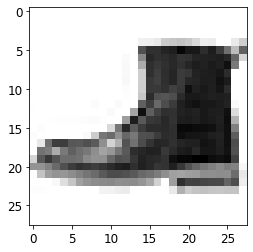

In [74]:
plt.imshow(X_train[3], cmap='binary')

In [75]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

class_names[y_train[3]]

'Ankle boot'

Saving figure fashion_mnist_plot


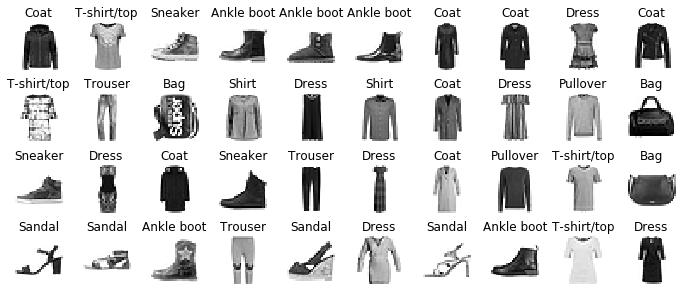

In [76]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

In [77]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [78]:
model.layers

In [79]:
model.summary()

Model: "sequential_34"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense_74 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_75 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_76 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


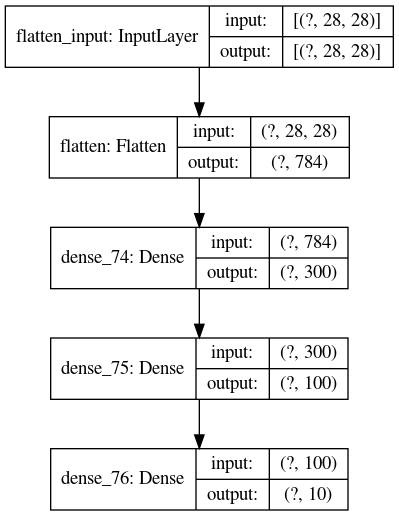

In [80]:
keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)


In [81]:

model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [82]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 27s 496us/sample - loss: 0.7168 - accuracy: 0.7631 - val_loss: 0.5176 - val_accuracy: 0.8172
Epoch 2/30
55000/55000 [==============================] - 16s 294us/sample - loss: 0.4832 - accuracy: 0.8317 - val_loss: 0.4527 - val_accuracy: 0.8436
Epoch 3/30
55000/55000 [==============================] - 17s 312us/sample - loss: 0.4380 - accuracy: 0.8470 - val_loss: 0.4207 - val_accuracy: 0.8564
Epoch 4/30
55000/55000 [==============================] - 25s 448us/sample - loss: 0.4134 - accuracy: 0.8546 - val_loss: 0.3901 - val_accuracy: 0.8662
Epoch 5/30
55000/55000 [==============================] - 24s 430us/sample - loss: 0.3941 - accuracy: 0.8621 - val_loss: 0.3971 - val_accuracy: 0.8636
Epoch 6/30
55000/55000 [==============================] - 27s 482us/sample - loss: 0.3782 - accuracy: 0.8667 - val_loss: 0.3698 - val_accuracy: 0.8732
Epoch 7/30
55000/55000 [=====================

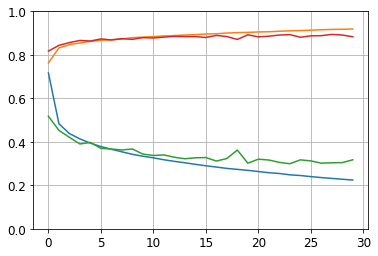

In [83]:
# check error rate
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [84]:
mse_test = model.evaluate(X_test, y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [86]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3))

val_train_ratio_cb = PrintValTrainRatioCallback()

history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid), 
                   callbacks=[checkpoint_cb, early_stopping_cb, val_train_ratio_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
54880/55000 [============================>.] - ETA: 0s - loss: 0.2007
val/train: 1.42
55000/55000 [==============================] - 22s 400us/sample - loss: 0.2008 - val_loss: 0.2855
Epoch 2/30
54880/55000 [============================>.] - ETA: 0s - loss: 0.1980
val/train: 1.44
55000/55000 [==============================] - 15s 278us/sample - loss: 0.1980 - val_loss: 0.2857
Epoch 3/30
54816/55000 [============================>.] - ETA: 0s - loss: 0.1969
val/train: 1.46
55000/55000 [==============================] - 19s 346us/sample - loss: 0.1969 - val_loss: 0.2869
Epoch 4/30
54944/55000 [============================>.] - ETA: 0s - loss: 0.1962
val/train: 1.46
55000/55000 [==============================] - 14s 263us/sample - loss: 0.1963 - val_loss: 0.2869
Epoch 5/30
54880/55000 [============================>.] - ETA: 0s - loss: 0.1957
val/train: 1.46
55000/55000 [==============================] - 11s 206us/sample - loss: 0.

11493376/11490434 [==============================] - 4s 0us/step


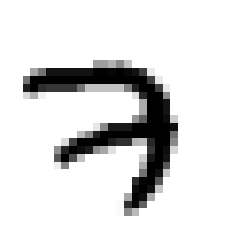

In [87]:
# check error rate


(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.


plt.imshow(X_train[0], cmap="binary")
plt.axis('off')
plt.show()

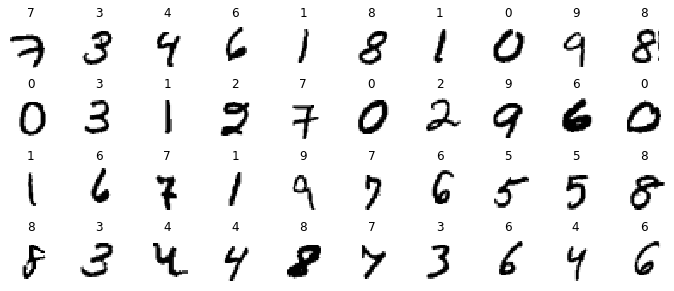

In [88]:


n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [89]:

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)      
        
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=1e-3),
              metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)


history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

Train on 55000 samples, validate on 5000 samples
55000/55000 [==============================] - 32s 577us/sample - loss: nan - accuracy: 0.5719 - val_loss: nan - val_accuracy: 0.0958


Text(0, 0.5, 'Loss')

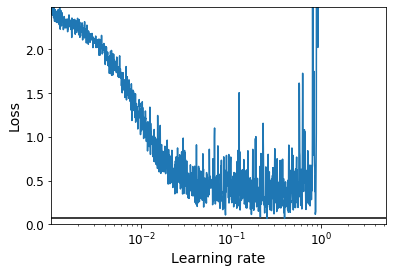

In [90]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.xlabel("Learning rate")
plt.ylabel("Loss")


In [91]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.SGD(lr=2e-1),
              metrics=["accuracy"])

run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir


early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))


val_train_ratio_cb = PrintValTrainRatioCallback()

history = model.fit(X_train, y_train, epochs=100,
                    validation_data=(X_valid, y_valid),
                    callbacks=[early_stopping_cb, checkpoint_cb, tensorboard_cb])

Train on 55000 samples, validate on 5000 samples
Epoch 1/100
55000/55000 [==============================] - 35s 633us/sample - loss: 0.2364 - accuracy: 0.9279 - val_loss: 0.0943 - val_accuracy: 0.9722
Epoch 2/100
55000/55000 [==============================] - 25s 457us/sample - loss: 0.0966 - accuracy: 0.9701 - val_loss: 0.0876 - val_accuracy: 0.9752
Epoch 3/100
55000/55000 [==============================] - 33s 601us/sample - loss: 0.0654 - accuracy: 0.9798 - val_loss: 0.0709 - val_accuracy: 0.9790
Epoch 4/100
55000/55000 [==============================] - 29s 524us/sample - loss: 0.0453 - accuracy: 0.9855 - val_loss: 0.0754 - val_accuracy: 0.9782
Epoch 5/100
55000/55000 [==============================] - 21s 376us/sample - loss: 0.0347 - accuracy: 0.9884 - val_loss: 0.0684 - val_accuracy: 0.9806
Epoch 6/100
55000/55000 [==============================] - 21s 378us/sample - loss: 0.0237 - accuracy: 0.9924 - val_loss: 0.0780 - val_accuracy: 0.9814
Epoch 7/100
55000/55000 [==============

In [ ]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0, 1, 2, 3],
    "n_neurons": np.arange(1, 100),
    "learning_rate": reciprocal(3e-4, 3e-2),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                  validation_data=(X_valid, y_valid),
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])